# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown here.

Logistic Regression is a good method for classification (predict discrete categories). 

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [98]:
# Print the shape of the DataFrame
train.shape

(891, 12)

In [3]:
# Print the 3 first lines 
train.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [100]:
# Check if cells are empty 
train.isnull().head()

PassengerId Survived Pclass   Name    Sex    Age  SibSp  Parch Ticket  \
0       False    False  False  False  False  False  False  False  False   
1       False    False  False  False  False  False  False  False  False   
2       False    False  False  False  False  False  False  False  False   
3       False    False  False  False  False  False  False  False  False   
4       False    False  False  False  False  False  False  False  False   

    Fare  Cabin Embarked  
0  False   True    False  
1  False  False    False  
2  False   True    False  
3  False  False    False  
4  False   True    False

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

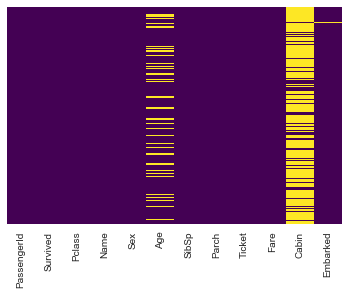

In [4]:
# Easily visualise empty cells by ploting a heatmap of the isnull table
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later.

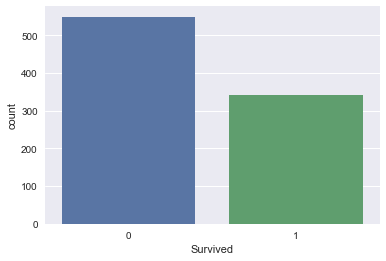

In [5]:
# A countplot is an histogram of value occurences in a column
sns.countplot(x='Survived',data=train)

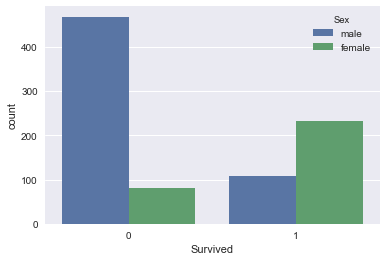

In [6]:
# You can add a 'hue' to take into account another column in your histogram 
sns.countplot(x='Survived',hue='Sex',data=train)

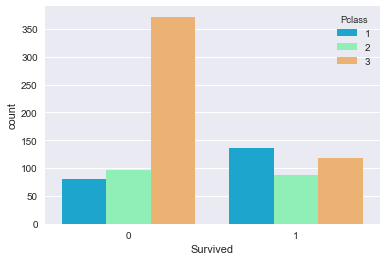

In [7]:
# Change the color by adding a palette. Available palettes are in seaborn documentation
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

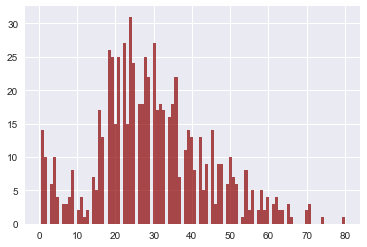

In [8]:
# You can also choose to plot directly with matplotlib by calling the .hist 
# function directly on the desired column
train['Age'].hist(bins=100,color='darkred',alpha=0.7)

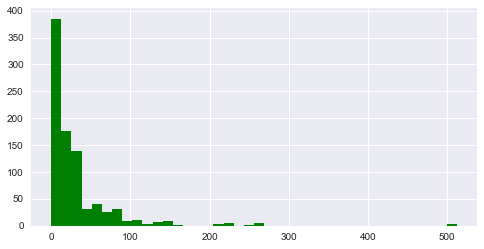

In [106]:
# The "bins" variable defines the number of bars in the graph
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

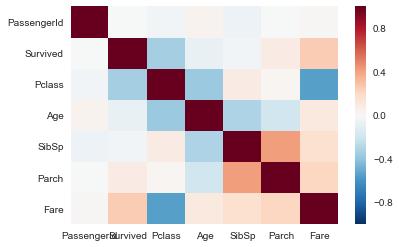

In [107]:
# Get a correlation matrix of the columns
corr = train.corr()
# And  plot a heatmap from it
sns.heatmap(corr)

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [108]:
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [109]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

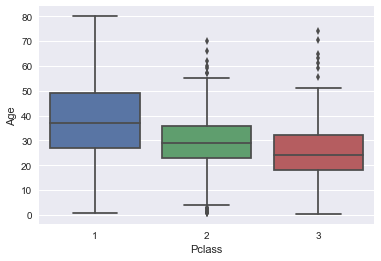

In [110]:
# Box plot of ages VS Pclass
sns.boxplot(x='Pclass',y='Age',data=train)
# Get the mean of age per Pclass
train.groupby('Pclass')['Age'].mean()

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [111]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

Now apply that function!

In [112]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

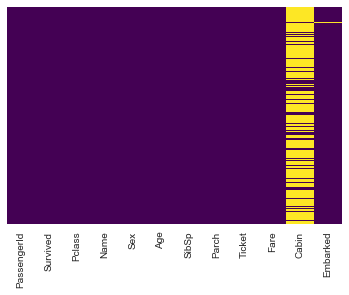

In [113]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [114]:
# Drop the 'Cabin' column
train = train.drop('Cabin',axis=1)

In [115]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [116]:
# Removing any row with remaining empty value
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas!  
Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [119]:
# Change 'H' and 'F' values of sex column for 1s and 0s
sex = pd.get_dummies(train['Sex'],drop_first=True)
# Change the 'Q' and 'S'  of sex column for 1s and 0s
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [120]:
# Remove old columns and unused ones 
# 'Names' and 'Ticket' are not relevant for the analysis
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [121]:
# Concatatenate our table with dummy columns
train = pd.concat([train,sex,embark],axis=1)

In [123]:
# Check the result
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

Great! Our data is ready for our model!

# Building a Logistic Regression model

The usual process in Machine Learning is to split the available data into a training and a testing dataset.  
In fact we don't want to test our algorithm on the same data we used to train it, it would be too easy !  

Let's start by splitting our data into a training set and test set.  
Hopefully there is a special function in sklearn to do that. 

The test_size is 0.30 which means we are going to use 70% of the data to train our algorithm. 
- X_train contains 70% of the data, without the 'survived' column
- y_train contains the matching 'Survived' column
- X_test contains 30% of the data without the labeled column, and will be use to test our algorithm once trained
- y_test contains the matching 'Survied' column and will be uses to compare the predictions of the algorithm with reality. 


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Generating all our training and testing values at once
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [73]:
# LogisticRegression is a classic classification algorithm
# We start by importing it
from sklearn.linear_model import LogisticRegression

In [74]:
# We then create an empty LogisticRegression instance
logmodel = LogisticRegression()
# And we through the training data to the algorithm with the .fit function
logmodel.fit(X_train,y_train)
# Now our logmodel has some nowledge about our problem and will be able to make some predictions

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
# Let's try to predict the death or our testing passengers
predictions = logmodel.predict(X_test)
# predictions is basically a prediction of the train['Survived'] column for testing data

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267

[[151  12]
 [ 36  68]]


**The precision ** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.


**The recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

**The F1 score** can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The formula for the F1 score is:
F1 = 2 * (precision * recall) / (precision + recall)


**The support** is the number of occurrences of each class in y_true.

**Confusion matrix** : a matrix where C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.
